<a href="https://colab.research.google.com/github/AryaWiratama26/citra/blob/main/Pengolahan_Citra_Pertemuan_6_Arya_Wiratama_312310224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library CV2

- cv2: library utama OpenCV untuk olah citra.

- numpy: untuk array (default di OpenCV gambar itu array NumPy).

- cv2_imshow: dipakai di Google Colab untuk menampilkan gambar (karena cv2.imshow biasa tidak berfungsi di browser).





In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
- cv2.imread: Membaca file gambar "many fruits.png".

- imagecopy: Menyimpan salinan gambar asli. Ini penting supaya gambar aslinya tidak dirusak kalau nanti kita gambar kontur di atasnya.



In [ ]:
image = cv2.imread('/content/many_fruits.jpg')
imagecopy = image.copy()


# Menampilkan gambat asli
- cv2_imshow(image): Menampilkan gambar asli.

- cv2.waitKey(0): Menunggu tombol ditekan agar jendela gambar tidak langsung nutup.

- cv2.destroyAllWindows(): Menutup semua jendela OpenCV.



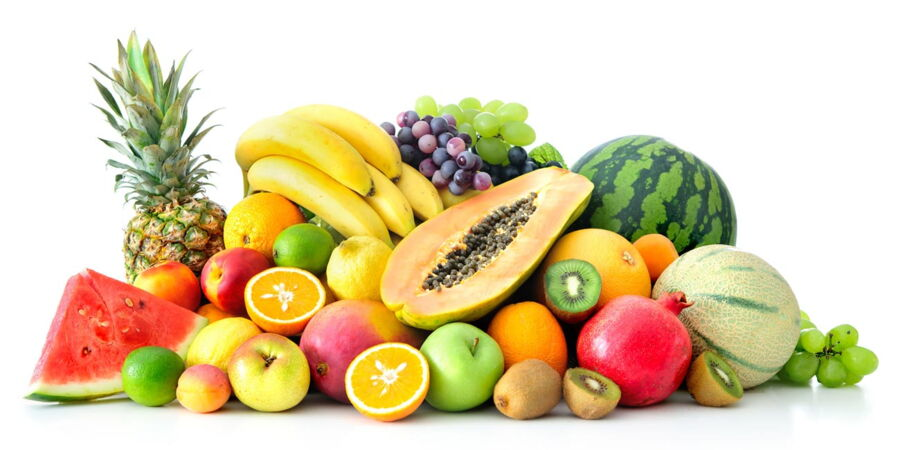

In [ ]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Mengubah Gambar Menjadi Grayscale
- cv2.cvtColor(image, cv2.COLOR_BGR2GRAY): Mengubah gambar warna menjadi abu-abu (grayscale).

- Tujuan: supaya gambar lebih sederhana, hanya 1 channel warna.



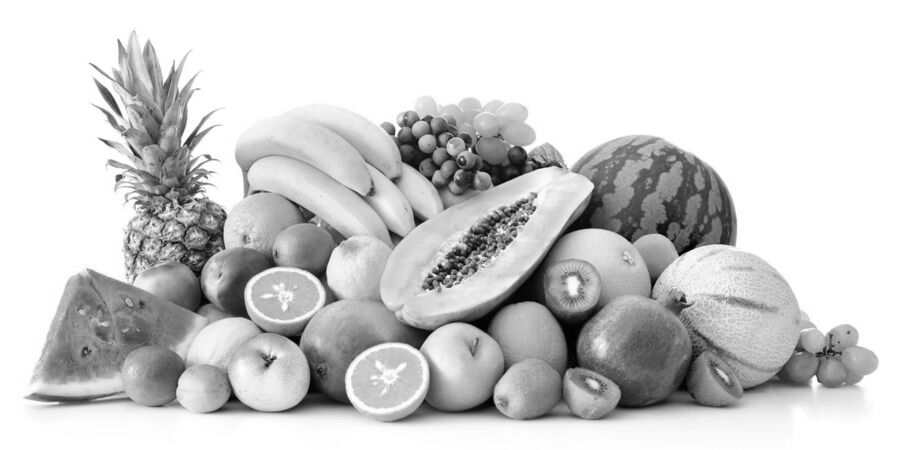

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)


# Membuat Gambar Binary

- cv2.threshold: Membuat gambar menjadi hitam-putih:

- Pixel di atas 245 jadi putih (255).

- Pixel di bawah 245 jadi hitam (0).

- Ini penting untuk menemukan objek dengan jelas.



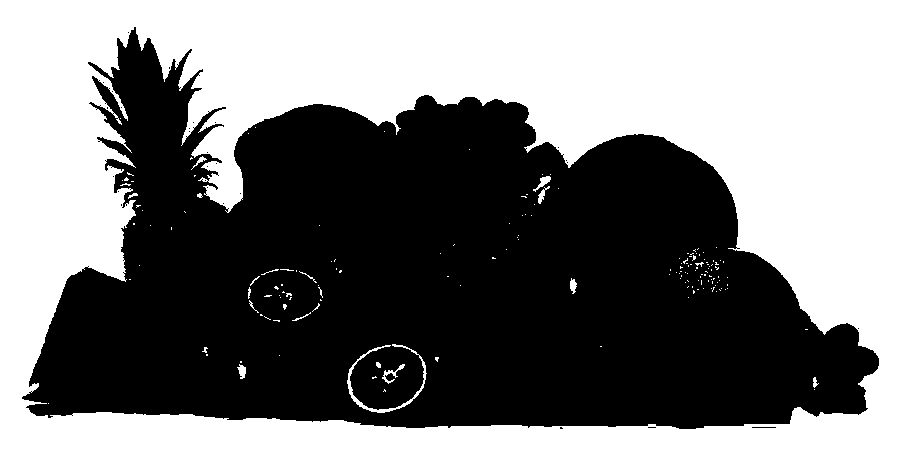

In [ ]:
ret, binary_im = cv2.threshold(gray_image, 245, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_im)

# Membalikkan Gambar (Inversi)
- ~binary_im: Membalik warna: Yang tadinya putih jadi hitam. Yang tadinya hitam jadi putih.

- Tujuan: agar objek buah-buahannya jadi putih dan latar belakang jadi hitam. (OpenCV lebih gampang mencari kontur objek putih.)


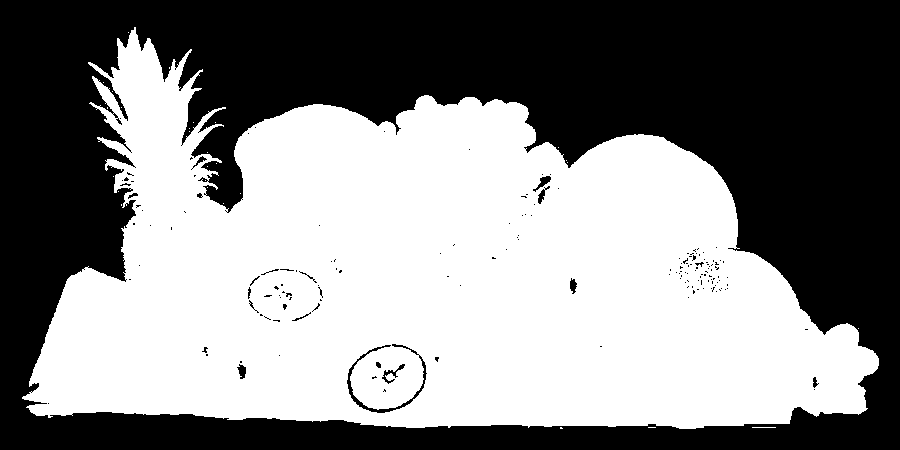

In [ ]:
binary_im = ~binary_im
cv2_imshow(binary_im)


# Mencari Kontur Objek
- cv2.findContours: Mencari kontur (garis tepi) objek putih di gambar.

- cv2.RETR_EXTERNAL: Hanya mencari kontur terluar (kontur dalam tidak diambil).

- cv2.CHAIN_APPROX_SIMPLE: Menyimpan hanya titik-titik penting, supaya kontur lebih ringan.



In [ ]:
contours, hierarchy = cv2.findContours(binary_im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menggambar Kontur di Gambar

- cv2.drawContours:

Menggambar semua kontur (-1 artinya semua kontur).

Warna merah (0, 0, 255) di format BGR.

Ketebalan garis 3 piksel.

- Kontur digambar di atas imagecopy, bukan gambar asli.



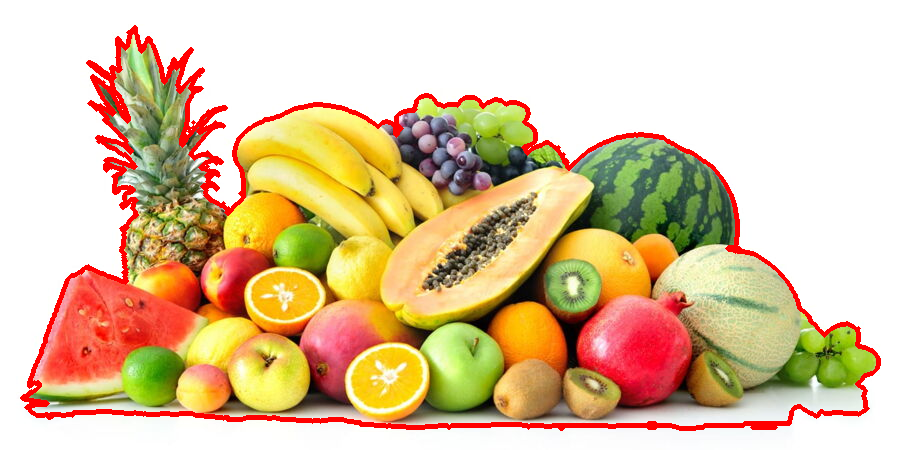

In [ ]:
with_contours = cv2.drawContours(imagecopy, contours, -1, (0, 0, 255), 3)
cv2_imshow(with_contours)
